# John Deere Tractor Sales Forecasting

In [27]:
import warnings
import itertools
import pandas as pd
import numpy as np
from io import StringIO
import requests
import matplotlib.pyplot as plt
    
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline
plt.style.use('bmh')

## Data Reading and  Data Preprocessing 

In [28]:
sales_data = pd.read_csv(r'E:\Power BI files\Tractor-Sales.csv')

In [29]:
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [30]:
## Creating date range equal to length of Month_Year column and with same interval as that of Month-Year column 

In [31]:
dates = pd.date_range(start='2003-01-01',freq='MS',periods=len(sales_data))

In [32]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [33]:
sales_data['Month-Year']

0      Jan-03
1      Feb-03
2      Mar-03
3      Apr-03
4      May-03
        ...  
139    Aug-14
140    Sep-14
141    Oct-14
142    Nov-14
143    Dec-14
Name: Month-Year, Length: 144, dtype: object

In [34]:
import calendar

In [35]:
sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply( lambda x:calendar.month_abbr[x])

In [36]:
# creating Mionth and Year separate columns so that can drop Month-Year column becoz it has object data type

In [37]:
sales_data['Year'] = dates.year

In [38]:
sales_data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [39]:
sales_data.columns

Index(['Month-Year', 'Number of Tractor Sold', 'Month', 'Year'], dtype='object')

In [40]:
# Renaming the columns 

In [41]:
sales_data.columns = ['Month-Year', 'Tractor sales', 'Month', 'Year']

In [42]:
sales_data.head()

,Month-Year,Tractor sales,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [43]:
sales_data.drop(['Month-Year'],axis=1,inplace=True)

In [44]:
# Reorganising the columns

In [45]:
sales_data=sales_data[['Month','Year','Tractor sales']]

In [46]:
sales_data.head()

,Month,Year,Tractor sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [47]:
# To make the data a time series will set date renge as index

In [48]:
sales_data.set_index(dates,inplace=True)

In [49]:
sales_data.head()

,Month,Year,Tractor sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [50]:
sales_data.shape

(144, 3)

## Data Visualisation

In [51]:
plt.style.use(['dark_background'])

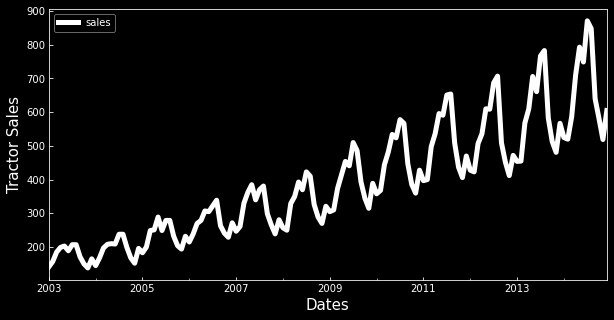

In [52]:
sales_data['Tractor sales'].plot(c='w',label='sales',figsize=(10,5),lw=5)
plt.legend(loc='best',shadow=True)
plt.xlabel('Dates',fontsize=15)
plt.ylabel('Tractor Sales',color='w',fontsize=15)
plt.grid(b=False)

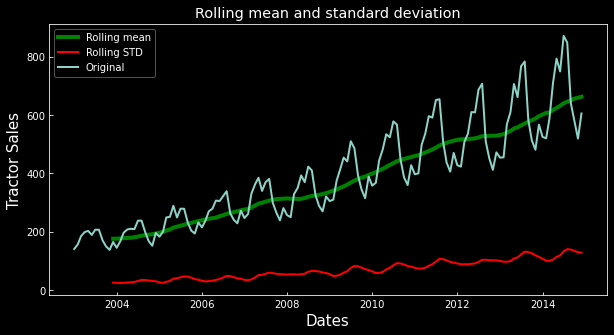

In [53]:
plt.figure(figsize=(10,5))
roll_mean = sales_data['Tractor sales'].rolling(window=12).mean()
roll_std = sales_data['Tractor sales'].rolling(window=12).std()

plt.plot(roll_mean,label="Rolling mean",c='g',lw=4)
plt.plot(roll_std,label='Rolling STD',c='red')
plt.plot(sales_data['Tractor sales'],label='Original')
plt.legend(loc='best')
plt.xlabel('Dates',fontsize=15)
plt.ylabel('Tractor Sales',color='w',fontsize=15)
plt.title('Rolling mean and standard deviation')
plt.grid(b=False)

In [54]:
monthly_sales_data = pd.pivot_table(sales_data, columns='Year',values='Tractor sales',index='Month')

In [55]:
monthly_sales_data.head()

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525


In [56]:
monthly_sales_data=monthly_sales_data.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Oct','Sep','Nov','Dec'])

In [57]:
monthly_sales_data.head()

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793


Text(0.5, 1.0, 'Tractor sales Distribution in Different Months')

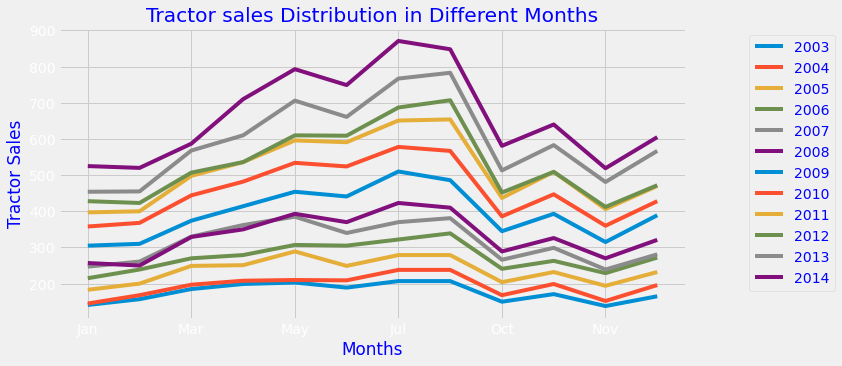

In [58]:
plt.style.use(['fivethirtyeight'])
monthly_sales_data.plot(figsize=(10,5))
plt.ylabel("Tractor Sales",fontdict={'color':'blue'})
plt.xlabel('Months',fontdict={'color':'blue'})
plt.legend(loc='best',labelcolor='BLUE',bbox_to_anchor=(0.5, 0., 0.75, 1))
plt.title('Tractor sales Distribution in Different Months',fontdict={'color':'blue'})

In [59]:
yearly_tractor_sales=pd.pivot_table(sales_data,columns='Month',values='Tractor sales',index='Year')

In [60]:
yearly_tractor_sales.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299


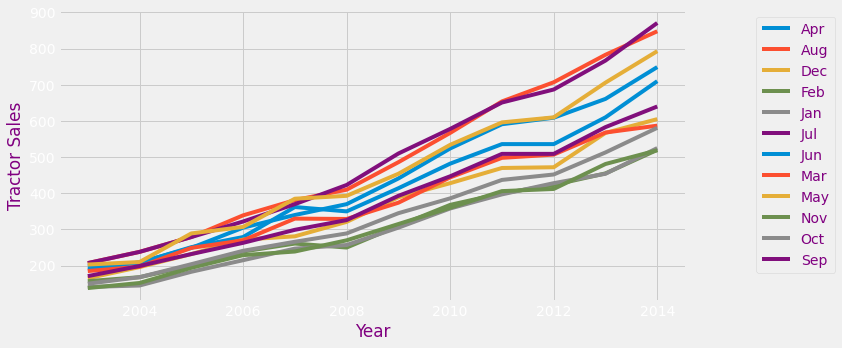

In [61]:
yearly_tractor_sales.plot(figsize=(10,5))
plt.xlabel('Year',fontdict={'color':'Purple'})
plt.ylabel('Tractor Sales',fontdict={'color':'Purple'})
plt.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.75, 1),labelcolor='Purple')

No handles with labels found to put in legend.


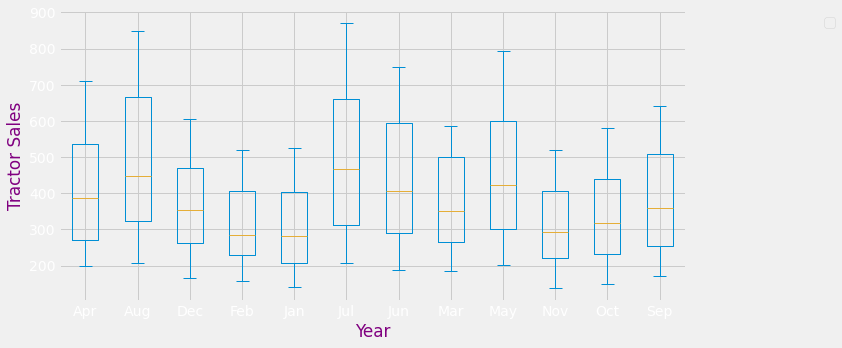

In [62]:
yearly_tractor_sales.plot(figsize=(10,5),kind='box')
plt.xlabel('Year',fontdict={'color':'Purple'})
plt.ylabel('Tractor Sales',fontdict={'color':'Purple'})
plt.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.75, 1),labelcolor='Purple')

In [63]:
sale_ts = sales_data['Tractor sales'] 

In [64]:
sale_ts = pd.DataFrame(data=sale_ts,index=sale_ts.index)

In [65]:
sale_ts.head()

,Tractor sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


## Decomposition of Seasonal Time Series

In [66]:
decomposed = seasonal_decompose(sale_ts)

Text(0.5, 1.0, 'Decomposition of Time Series')

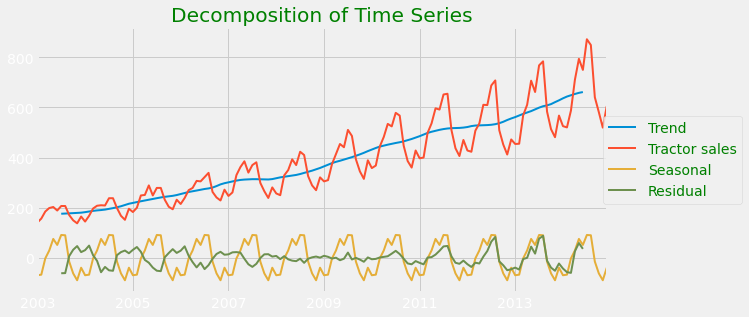

In [67]:
plt.subplot(223)
ax=decomposed.trend.plot(lw=2,label='Trend')
sale_ts.plot(ax=ax,figsize=(20,10),lw=2,label='Original')
decomposed.seasonal.plot(lw=2,label='Seasonal')
decomposed.resid.plot(lw=2,label='Residual')
plt.legend(loc='best',labelcolor='green',bbox_to_anchor=(0.5, 0., 0.75, 1))
plt.title('Decomposition of Time Series',fontdict={'color':'green'})


## Creating Multiple Possible Values of Seasonal Order

In [69]:
q=d=range(0,2)
p=range(0,4)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combination for seasonal ARIMA :')
print('SARIMAX : {} X {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX : {} X {}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX : {} X {}'.format(pdq[3],seasonal_pdq[3]))
print('SARIMAX : {} X {}'.format(pdq[4],seasonal_pdq[4]))

Examples of parameter combination for seasonal ARIMA :
SARIMAX : (0, 0, 1) X (0, 0, 1, 12)
SARIMAX : (0, 1, 0) X (0, 1, 0, 12)
SARIMAX : (0, 1, 1) X (0, 1, 1, 12)
SARIMAX : (1, 0, 0) X (1, 0, 0, 12)


## Model Building

In [70]:
import statsmodels.tsa.statespace.sarimax

In [71]:
warnings.filterwarnings('ignore')
AIC=[]
SARIMAX_model=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = statsmodels.tsa.statespace.sarimax.SARIMAX(sale_ts,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX model {} x {} - AIC {}'.format(param,param_seasonal,results.aic),end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param,param_seasonal])
        except:
            continue

In [72]:
print('The smallest AIC is {} for model SARIMAX{}'.format(min(AIC),SARIMAX_model[AIC.index(min(AIC))]))

The smallest AIC is 799.9064282670039 for model SARIMAX[(3, 1, 0), (3, 1, 1, 12)]


In [73]:
model = statsmodels.tsa.statespace.sarimax.SARIMAX(sale_ts,order=SARIMAX_model[AIC.index(min(AIC))][0],seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],enforce_stationarity=False,enforce_invertibility=False)

In [74]:
result=model.fit()

Text(0.5, 1.0, 'Daignostic plot')

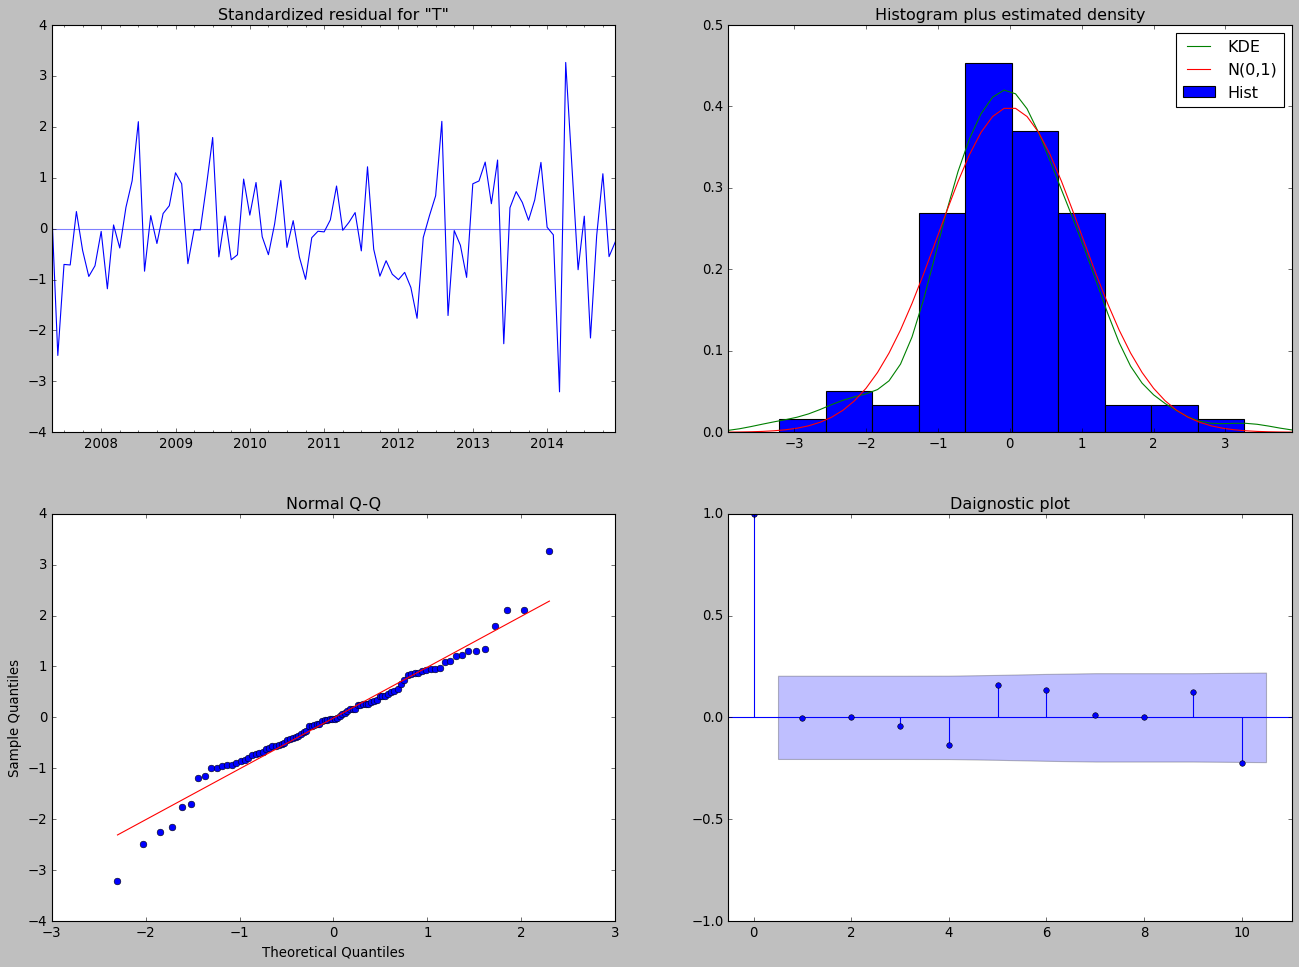

In [75]:
plt.style.use('classic')

result.plot_diagnostics(figsize=(20,14))
plt.title('Daignostic plot')


## Model Prediction and Forecasting 

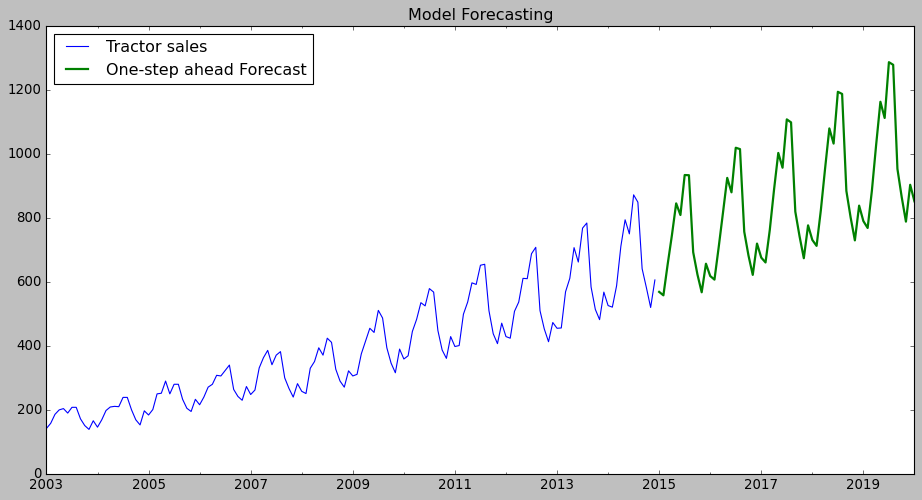

In [80]:
pred = result.get_prediction(start=pd.to_datetime('2015-01-01'),end=pd.to_datetime('2020-01-01'),dynamic=True)
ax=sale_ts.plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',lw=2, alpha=1, figsize=(14, 7))
plt.title('Model Forecasting')
plt.legend(loc='best')